In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

repair_data = pd.read_csv('../repairs.csv')
cache_data = pd.read_csv('../cache.csv')

In [104]:
repair_data.info()
repair_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6174 entries, 0 to 6173
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6174 non-null   int64  
 1   ontology            6174 non-null   object 
 2   failed              6174 non-null   bool   
 3   failed_repair       4877 non-null   object 
 4   steps               4400 non-null   float64
 5   time                4400 non-null   float64
 6   calls               4400 non-null   float64
 7   iic_mcs             4358 non-null   float64
 8   iic_remove          4348 non-null   float64
 9   inf_mcs             4358 non-null   float64
 10  inf_weakening       4358 non-null   float64
 11  inf_remove          4348 non-null   float64
 12  failed_enhance      4400 non-null   object 
 13  steps_enhance       4340 non-null   float64
 14  time_enhance        4340 non-null   float64
 15  calls_enhance       4340 non-null   float64
 16  inf_en

,Unnamed: 0,steps,time,calls,iic_mcs,iic_remove,inf_mcs,inf_weakening,inf_remove,steps_enhance,time_enhance,calls_enhance,inf_enhance,iic_enhance_weaken,iic_enhance_mcs,iic_enhance_remove,iic_mcs_remove
count,6174.000000,4400.000000,4400.000000,4400.000000,4358.000000,4348.000000,4358.000000,4358.000000,4348.000000,4340.000000,4340.000000,4340.000000,4301.000000,4301.000000,4301.000000,4291.000000,4348.000000
mean,3086.500000,2.437500,6760.947500,6746.289091,0.515399,0.595590,2718.612207,2743.865764,2669.261270,14.066129,5097.848618,5697.263825,2877.455708,0.599634,0.614190,0.690109,0.534715
std,1782.424613,5.897372,22399.376864,8113.250815,0.365929,0.332961,3164.818618,3265.417304,3193.365252,51.826790,18607.169561,6748.229582,3390.623695,0.340654,0.366319,0.335372,0.331809
min,0.000000,1.000000,605.000000,535.000000,0.000000,0.000000,120.000000,117.000000,117.000000,1.000000,516.000000,63.000000,119.000000,0.000000,0.000000,0.000000,0.000000
25%,1543.250000,1.000000,1430.000000,2142.500000,0.134342,0.500000,444.250000,406.250000,393.000000,1.000000,953.000000,1426.750000,437.000000,0.375000,0.341463,0.500000,0.301370
50%,3086.500000,1.000000,2143.500000,3934.500000,0.500000,0.500000,875.000000,875.000000,875.000000,2.000000,1422.500000,3029.000000,903.000000,0.573427,0.685573,0.806262,0.500000
75%,4629.750000,2.000000,3805.500000,8165.500000,0.900000,0.997990,5288.750000,5427.000000,5159.250000,7.000000,2313.750000,7056.000000,5704.000000,0.969925,0.993750,1.000000,0.878935
max,6173.000000,143.000000,289736.000000,112949.000000,1.000000,1.000000,18006.000000,17766.000000,17766.000000,1028.000000,296601.000000,81163.000000,18051.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
repair_data['Ontology'] = repair_data['ontology']
repair_data['Has failed'] = repair_data['failed'].map(
    {True: 'Yes', False: 'No'})
repair_data['Has failed weakening'] = repair_data['failed_repair'].map(
    {True: 'Yes', False: 'No'})
repair_data['Weakening steps'] = repair_data['steps']
repair_data['Repair time [ms]'] = repair_data['time']
repair_data['Reasoner calls'] = repair_data['calls']
repair_data['IIC w.r.t. maximal consistent subset'] = repair_data['iic_mcs']
repair_data['IIC w.r.t. repair by removal'] = repair_data['iic_remove']
repair_data['Inferred (weakening)'] = repair_data['inf_weakening']
repair_data['Inferred (MCS)'] = repair_data['inf_mcs']
repair_data['Inferred (removal)'] = repair_data['inf_remove']
repair_data['Weakening steps v2'] = repair_data['steps_enhance']
repair_data['Repair time [ms] v2'] = repair_data['time_enhance']
repair_data['Reasoner calls v2'] = repair_data['calls_enhance']
repair_data['Inferred (weakening v2)'] = repair_data['inf_enhance']
repair_data['v2 IIC w.r.t. maximal consistent subset'] = repair_data['iic_enhance_mcs']
repair_data['v2 IIC w.r.t. repair by removal'] = repair_data['iic_enhance_remove']
repair_data['v2 IIC w.r.t. weakening'] = repair_data['iic_enhance_weaken']
repair_data['MCS IIC w.r.t. removal'] = repair_data['iic_mcs_remove']

In [106]:
cache_data.info()
cache_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37791 entries, 0 to 37790
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37791 non-null  int64  
 1   ontology    37791 non-null  object 
 2   reasoner    37791 non-null  object 
 3   size        37791 non-null  int64  
 4   type        37791 non-null  object 
 5   time        37791 non-null  float64
 6   calls       37791 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.0+ MB


,Unnamed: 0,size,time,calls
count,37791.000000,37791.000000,37791.000000,37791.000000
mean,18895.000000,16.332460,309.677654,7199.666524
std,10909.466348,23.338733,694.406608,11597.458895
min,0.000000,1.000000,0.000000,0.000000
25%,9447.500000,5.000000,29.050000,885.700000
50%,18895.000000,10.000000,81.400000,2324.800000
75%,28342.500000,20.000000,271.400000,7169.005000
max,37790.000000,100.000000,12190.000000,84194.000000


In [107]:
cache_data['Ontology'] = cache_data['ontology']
cache_data['Reasoner'] = cache_data['reasoner'].map(
    {'fact++': 'FaCT++', 'hermit': 'HermiT', 'jfact': 'JFact', 'openllet': 'Openllet'})
cache_data['Weakening steps'] = cache_data['size']
cache_data['Caching strategy'] = cache_data['type'].map(
    {'full': 'Caching using transitivity', 'basic': 'Simple caching', 'uncached': 'No caching'})
cache_data['Time per weakening [ms]'] = cache_data['time']
cache_data['Reasoner calls per weakening'] = cache_data['calls']

{'admin': (6.3, (4.0, 9.2)), 'ahso': (2.1, (1.7, 2.5)), 'cdao': (2.1, (1.8, 2.5)), 'cdpeo': (1.5, (1.3, 1.7)), 'covid19-ibo': (1.3, (1.2, 1.5)), 'ecp': (1.3, (1.2, 1.5)), 'emo': (1.4, (1.3, 1.6)), 'evi': (5.0, (3.9, 6.4)), 'falls': (1.5, (1.3, 1.6)), 'fo': (1.6, (1.4, 1.8)), 'gbm': (1.5, (1.3, 1.6)), 'gfvo': (1.8, (1.6, 2.0)), 'koro': (1.9, (1.7, 2.2)), 'lico': (2.6, (2.2, 2.9)), 'mamo': (2.5, (2.2, 2.9)), 'mpio': (2.2, (1.8, 2.6)), 'pizza': (2.0, (1.7, 2.3)), 'provo': (4.9, (3.7, 6.3)), 'qudt': (1.1, (1.0, 1.2)), 'trans': (3.2, (1.8, 5.1)), 'triage': (3.2, (2.4, 4.3)), 'vio': (2.5, (2.1, 3.0))}


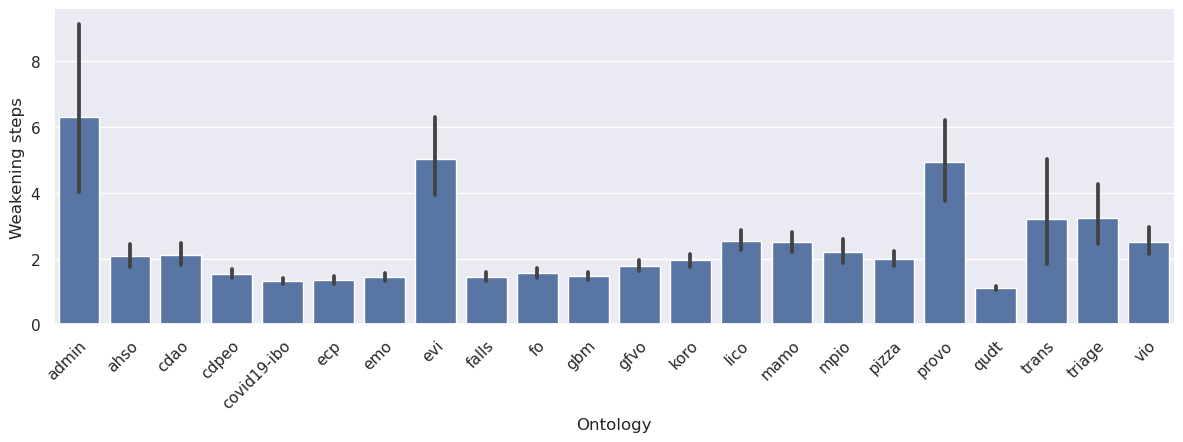

In [126]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Weakening steps', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.05, 1) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.05, 1) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['steps'].mean(), 1), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (13.3, (4.3, 25.0)), 'ahso': (13.6, (5.8, 25.2)), 'cdao': (3.9, (2.9, 5.2)), 'cdpeo': (3.0, (2.4, 4.0)), 'covid19-ibo': (2.1, (1.8, 2.5)), 'ecp': (7.4, (5.1, 10.0)), 'emo': (2.7, (2.2, 3.3)), 'evi': (91.9, (71.8, 114.0)), 'falls': (3.1, (2.4, 4.0)), 'fo': (10.4, (6.2, 16.1)), 'gbm': (3.5, (2.8, 4.1)), 'gfvo': (10.3, (7.6, 14.1)), 'koro': (5.6, (4.6, 6.8)), 'lico': (10.7, (8.6, 13.0)), 'mamo': (13.3, (10.7, 15.9)), 'mpio': (4.2, (3.5, 5.0)), 'pizza': (28.4, (21.3, 36.8)), 'provo': (35.2, (27.1, 44.1)), 'qudt': (1.8, (1.5, 2.1)), 'trans': (2.8, (2.1, 3.6)), 'triage': (34.0, (23.0, 47.2)), 'vio': (10.5, (7.4, 14.4))}


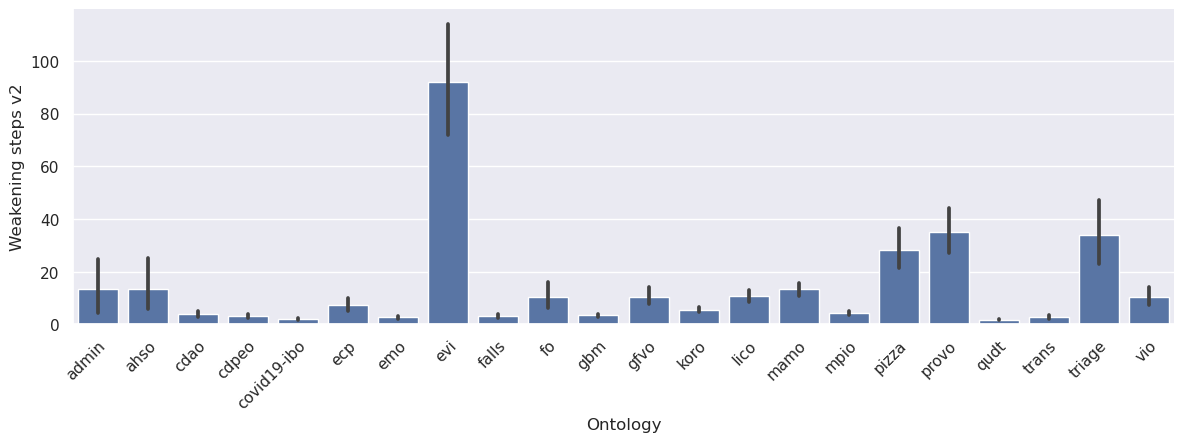

In [127]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Weakening steps v2', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-enhance-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.05, 1) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.05, 1) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['steps_enhance'].mean(), 1), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (9638, (5433, 14909)), 'ahso': (11469, (8122, 15336)), 'cdao': (20767, (15204, 27269)), 'cdpeo': (2050, (1942, 2169)), 'covid19-ibo': (2208, (2126, 2296)), 'ecp': (4453, (2738, 6939)), 'emo': (6582, (4439, 9688)), 'evi': (4719, (3408, 6349)), 'falls': (874, (843, 909)), 'fo': (1090, (1025, 1164)), 'gbm': (2954, (2808, 3117)), 'gfvo': (2404, (2258, 2569)), 'koro': (2456, (2277, 2648)), 'lico': (3709, (3400, 4077)), 'mamo': (2215, (2046, 2403)), 'mpio': (987, (913, 1078)), 'pizza': (26767, (20554, 34014)), 'provo': (8878, (5962, 12348)), 'qudt': (6658, (4229, 9672)), 'trans': (3684, (1610, 6513)), 'triage': (8979, (6084, 13102)), 'vio': (15199, (10496, 20803))}


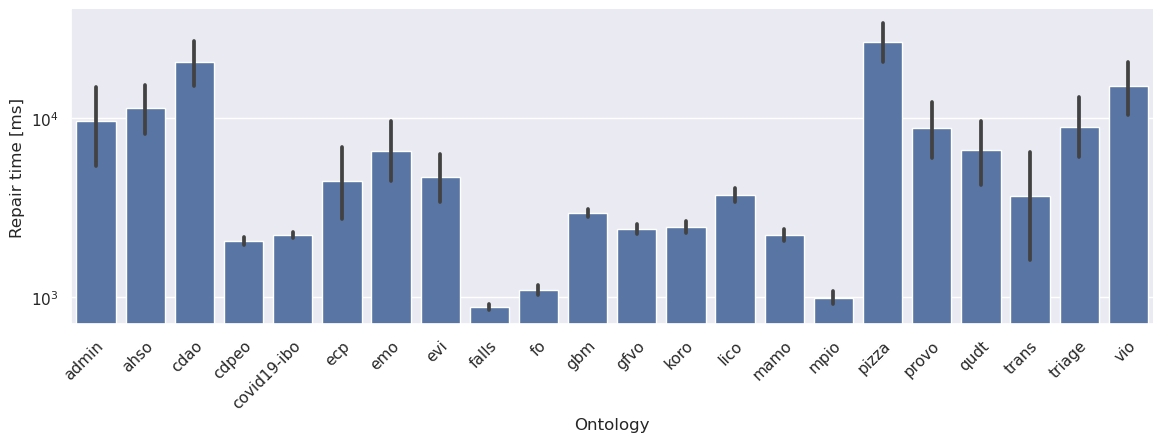

In [128]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Repair time [ms]', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/time-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['time'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (1834, (1142, 2869)), 'ahso': (12082, (7920, 16710)), 'cdao': (16868, (12180, 22423)), 'cdpeo': (1375, (1283, 1525)), 'covid19-ibo': (1698, (1644, 1757)), 'ecp': (2912, (1840, 4494)), 'emo': (7771, (4859, 11450)), 'evi': (6751, (4733, 9214)), 'falls': (651, (609, 701)), 'fo': (1358, (820, 2235)), 'gbm': (1793, (1733, 1862)), 'gfvo': (1527, (1303, 1906)), 'koro': (1406, (1275, 1554)), 'lico': (2438, (2220, 2679)), 'mamo': (1325, (1237, 1423)), 'mpio': (699, (674, 727)), 'pizza': (18099, (13518, 23582)), 'provo': (4831, (3398, 6682)), 'qudt': (5832, (3533, 8749)), 'trans': (1063, (997, 1139)), 'triage': (8790, (5447, 12864)), 'vio': (12995, (8246, 18875))}


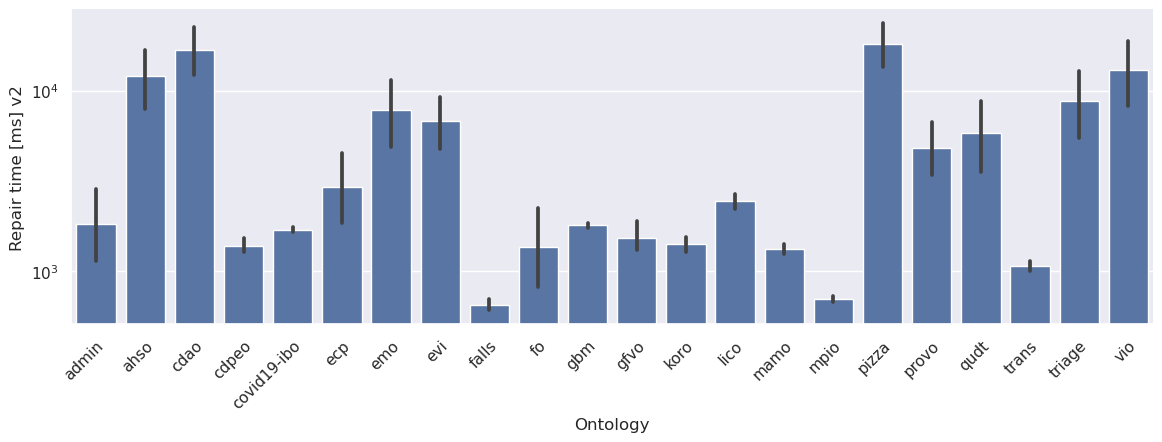

In [129]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Repair time [ms] v2', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/time-enhance-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['time_enhance'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (7621, (5601, 10118)), 'ahso': (4648, (4228, 5131)), 'cdao': (16137, (14576, 17740)), 'cdpeo': (4476, (4250, 4716)), 'covid19-ibo': (14822, (14321, 15320)), 'ecp': (2020, (1916, 2133)), 'emo': (18549, (17473, 19615)), 'evi': (5955, (4680, 7425)), 'falls': (1242, (1161, 1331)), 'fo': (1295, (1179, 1423)), 'gbm': (7608, (7070, 8131)), 'gfvo': (4167, (3864, 4501)), 'koro': (6195, (5697, 6706)), 'lico': (6638, (6105, 7186)), 'mamo': (4667, (4228, 5128)), 'mpio': (1908, (1720, 2133)), 'pizza': (7550, (6723, 8419)), 'provo': (6851, (5383, 8465)), 'qudt': (7044, (6816, 7291)), 'trans': (4384, (3213, 5894)), 'triage': (5166, (4255, 6351)), 'vio': (9476, (8628, 10327))}


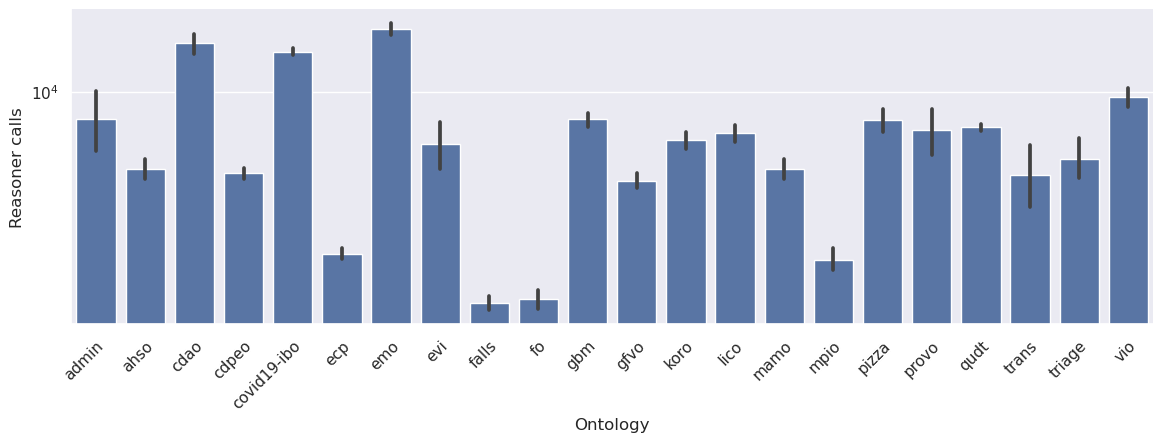

In [130]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Reasoner calls', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/calls-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['calls'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (3199, (2619, 3929)), 'ahso': (3489, (2981, 4136)), 'cdao': (17109, (15581, 18690)), 'cdpeo': (4359, (3903, 4850)), 'covid19-ibo': (14377, (13976, 14791)), 'ecp': (1686, (1435, 1975)), 'emo': (19406, (18699, 20060)), 'evi': (5577, (4316, 7016)), 'falls': (812, (700, 944)), 'fo': (1095, (591, 1863)), 'gbm': (7726, (7355, 8097)), 'gfvo': (3155, (2786, 3647)), 'koro': (6353, (5763, 7006)), 'lico': (4671, (4315, 5048)), 'mamo': (2749, (2505, 3001)), 'mpio': (1055, (1004, 1109)), 'pizza': (7180, (6203, 8261)), 'provo': (2860, (2427, 3358)), 'qudt': (6369, (6183, 6569)), 'trans': (2191, (2035, 2356)), 'triage': (3186, (2690, 3785)), 'vio': (7101, (6539, 7682))}


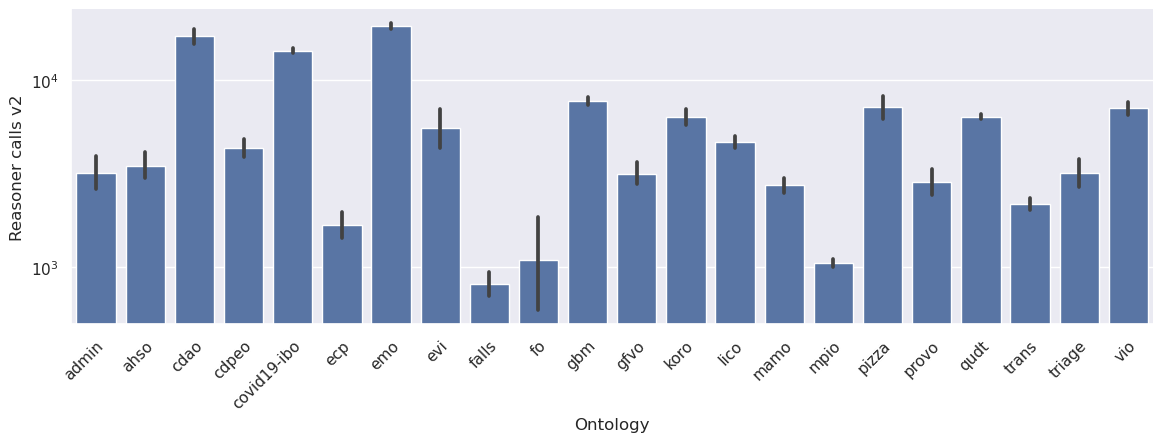

In [131]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Reasoner calls v2', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/calls-enhance-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['calls_enhance'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

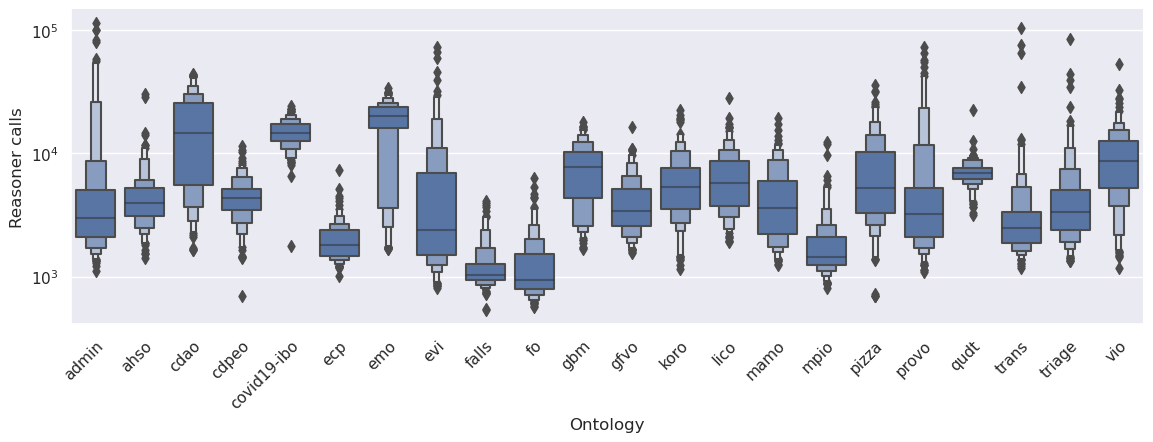

In [132]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Reasoner calls', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/calls-ontology-violin.png', dpi=100, bbox_inches = "tight")

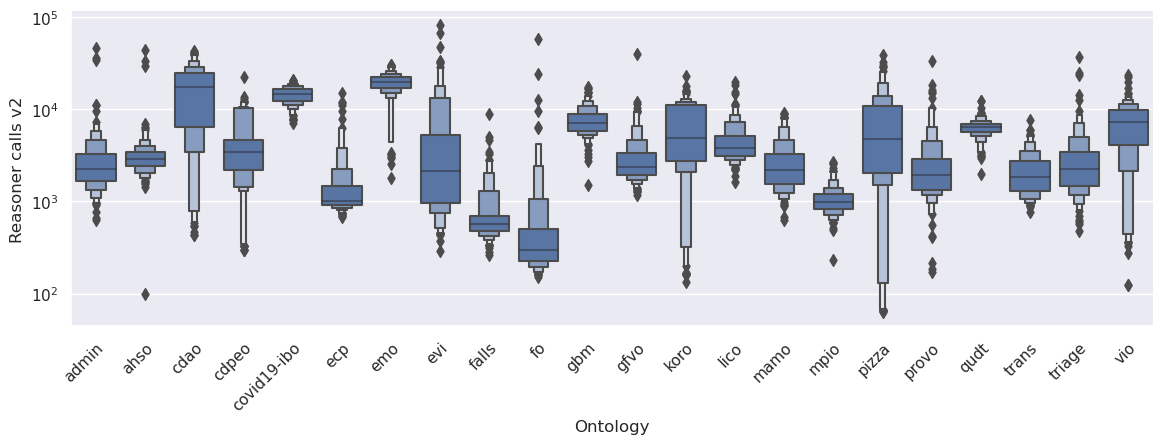

In [133]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Reasoner calls v2', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/calls-enhance-ontology-violin.png', dpi=100, bbox_inches = "tight")

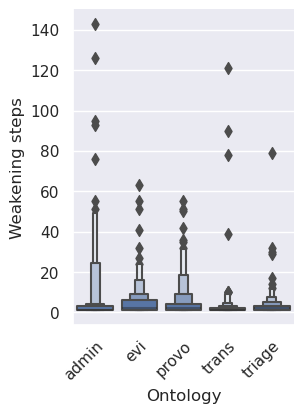

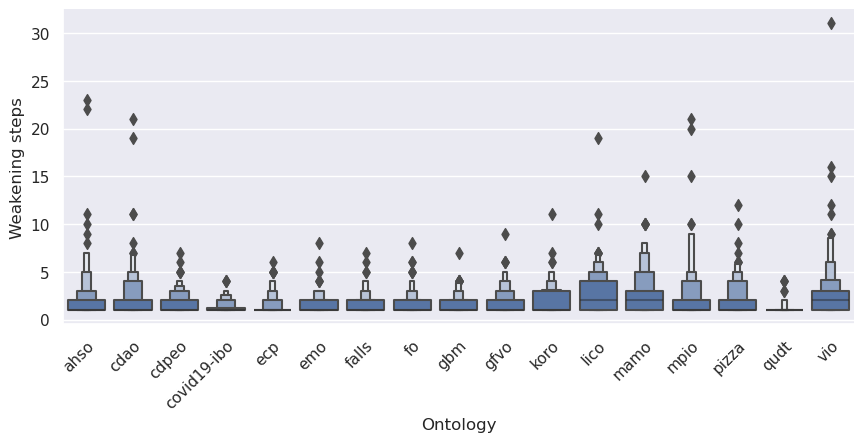

In [153]:
order = ['admin', 'evi', 'provo', 'trans', 'triage']
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Weakening steps', height=4, aspect=0.8, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-ontology-violin-1.png', dpi=100, bbox_inches = "tight")

order = sorted(set(np.unique(repair_data['Ontology'])) - set(order))
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Weakening steps', height=4, aspect=2.2, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-ontology-violin-2.png', dpi=100, bbox_inches = "tight")

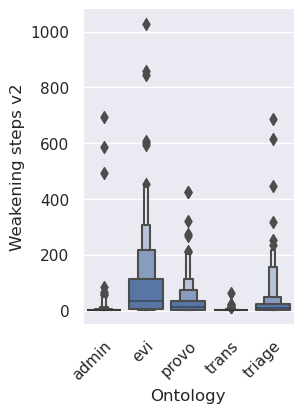

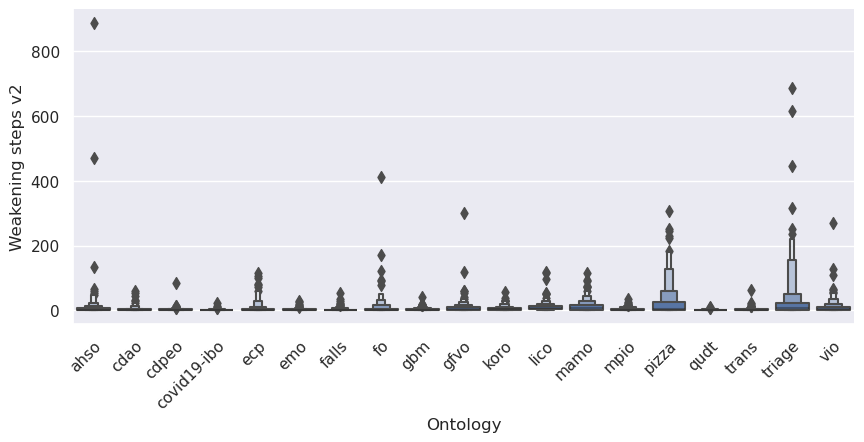

In [152]:
order = ['admin', 'evi', 'provo', 'trans', 'triage']
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Weakening steps v2', height=4, aspect=0.8, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-enhance-ontology-violin-1.png', dpi=100, bbox_inches = "tight")

order = sorted(set(np.unique(repair_data['Ontology'])) - {'admin', 'evi', 'provo'})
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Weakening steps v2', height=4, aspect=2.2, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-enhance-ontology-violin-2.png', dpi=100, bbox_inches = "tight")

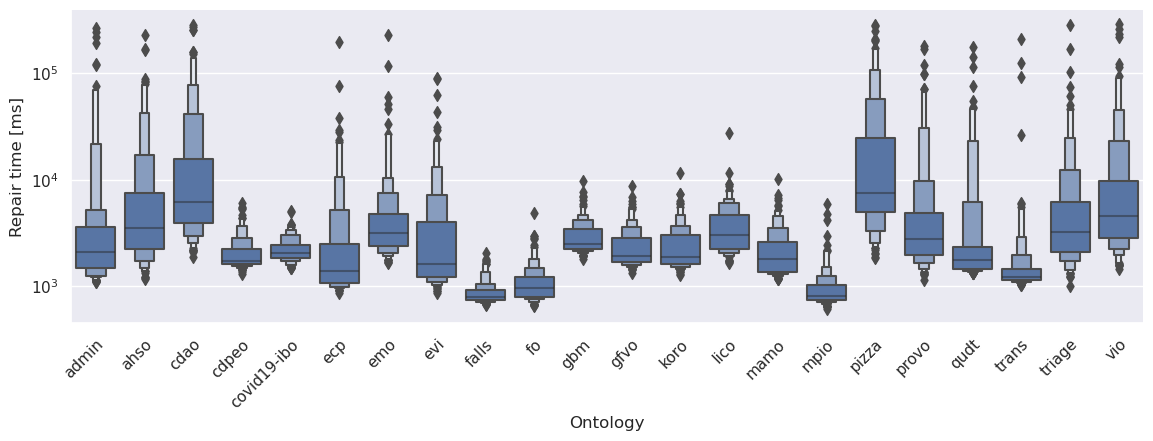

In [136]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Repair time [ms]', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/time-ontology-violin.png', dpi=100, bbox_inches = "tight")

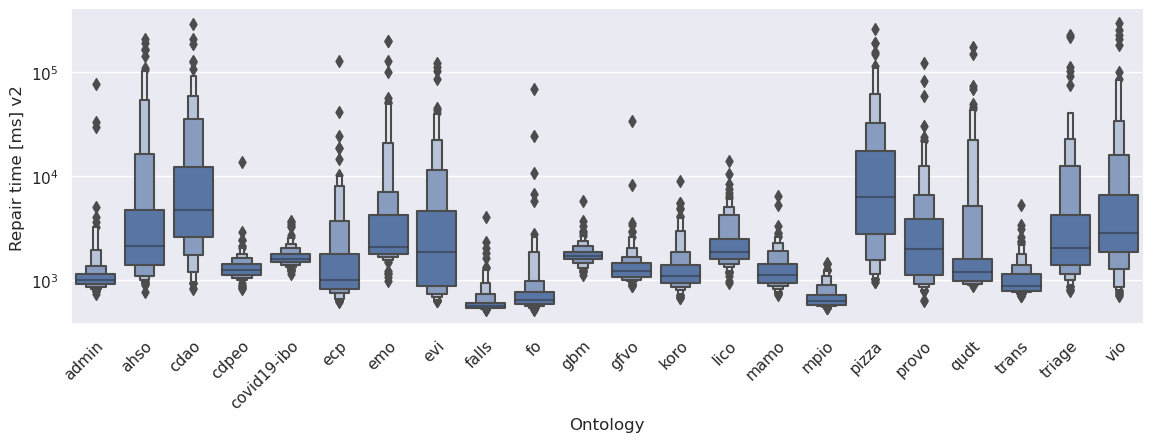

In [137]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='Repair time [ms] v2', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/time-enhance-ontology-violin.png', dpi=100, bbox_inches = "tight")

In [154]:
onto = np.unique(repair_data['Ontology'])
print({o: (
    # round(repair_data[repair_data['Ontology'] == o]['Weakening steps'].mean(), 1),
    # round(repair_data[repair_data['Ontology'] == o]['Reasoner calls'].mean()),
    # round(repair_data[repair_data['Ontology'] == o]['Repair time [ms]'].mean()),
    round(repair_data[repair_data['Ontology'] == o]['failed_repair'].mean() * 100),
    round(repair_data[repair_data['Ontology'] == o]['failed'].mean() * 100),
) for o in onto})

{'admin': (2, 2), 'ahso': (11, 26), 'cdao': (19, 48), 'cdpeo': (0, 0), 'covid19-ibo': (4, 13), 'ecp': (1, 14), 'emo': (1, 4), 'evi': (19, 64), 'falls': (1, 5), 'fo': (38, 61), 'gbm': (0, 0), 'gfvo': (0, 0), 'koro': (0, 0), 'lico': (1, 22), 'mamo': (0, 0), 'mpio': (9, 30), 'pizza': (28, 55), 'provo': (4, 8), 'qudt': (9, 38), 'trans': (0, 5), 'triage': (28, 51), 'vio': (3, 7)}


In [5]:

onto = np.unique(repair_data['Ontology'])
print({o: (
    # round(repair_data[repair_data['Ontology'] == o]['Weakening steps v2'].mean(), 1),
    # round(repair_data[repair_data['Ontology'] == o]['Reasoner calls v2'].mean()),
    # round(repair_data[repair_data['Ontology'] == o]['Repair time [ms] v2'].mean()),
    round(repair_data[repair_data['Ontology'] == o]['failed_enhance'].mean() * 100),
    round((repair_data[repair_data['Ontology'] == o]['failed'] |
          repair_data[repair_data['Ontology'] == o]['failed_enhance']).mean() * 100),
) for o in onto})

{'admin': (0, 2), 'ahso': (2, 28), 'cdao': (5, 51), 'cdpeo': (0, 0), 'covid19-ibo': (0, 13), 'ecp': (1, 15), 'emo': (0, 4), 'evi': (1, 64), 'falls': (0, 5), 'fo': (4, 63), 'gbm': (0, 0), 'gfvo': (0, 0), 'koro': (0, 0), 'lico': (0, 22), 'mamo': (0, 1), 'mpio': (0, 30), 'pizza': (8, 59), 'provo': (2, 9), 'qudt': (1, 39), 'trans': (0, 5), 'triage': (4, 53), 'vio': (2, 8)}
